Heart Disease Classifier Group Project

Group Members: Mya Bal, Rohan Shah, Timothy Gao, Luyi Xue

Heart disease is one of the leading causes of death for people of all ages. In order to prevent heart disease and inform the public about how to mitigate the risk of having one, health experts and data analysts must determine what causes heart disease in the first place. In order to try and determine what causes heart disease, we will be building a classifier which will predict whether an individual is at risk for heart disease or not. The dataset heart.csv will inform our classifier. This dataset surveyed hundreds of individuals and reports whether or not they have had a heart attack, as well as information about the individuals’ health and lifestyle. Through this project we are trying to answer the following question: is an individual at a high risk for heart disease based on their age, cholesterol level, resting blood pressure, maximum heart rate, chest pain type, gender, and resting electrocardiogram reading (ECG).

In [16]:
library(tidyverse)
library(tidymodels)
library(cowplot)
library(scales)

In [17]:
set.seed(1543)

Heart_disease_full <- read_csv("https://raw.githubusercontent.com/rohanrshah2/dsci-100-group-project/main/heart.csv")%>%
    mutate(HeartDisease = as_factor(HeartDisease))


Heart_disease <- Heart_disease_full %>%
            select(Age, RestingBP, Cholesterol, MaxHR, Oldpeak, HeartDisease)

Heart_disease

Heart_disease_split <- initial_split(Heart_disease, prop = 0.75, strata = HeartDisease)

Heart_disease_train <- training(Heart_disease_split)

Heart_disease_test <-testing(Heart_disease_split)

glimpse(Heart_disease_train)

#original dataset contained 918 observations and the training dataset (75% of the original) contains 689 observations
#75% was chosen because we felt this was a good balance between keeping enough test data to properly test our classifier and using enough training data
#to accurately inform our classifier and predictions

Parsed with column specification:
cols(
  Age = col_double(),
  Sex = col_character(),
  ChestPainType = col_character(),
  RestingBP = col_double(),
  Cholesterol = col_double(),
  FastingBS = col_double(),
  RestingECG = col_character(),
  MaxHR = col_double(),
  ExerciseAngina = col_character(),
  Oldpeak = col_double(),
  ST_Slope = col_character(),
  HeartDisease = col_double()
)



Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
40,140,289,172,0.0,0
49,160,180,156,1.0,1
37,130,283,98,0.0,0
48,138,214,108,1.5,1
54,150,195,122,0.0,0
39,120,339,170,0.0,0
45,130,237,170,0.0,0
54,110,208,142,0.0,0
37,140,207,130,1.5,1


Rows: 689
Columns: 6
$ Age          <dbl> 49, 37, 54, 45, 54, 37, 48, 37, 58, 39, 38, 43, 60, 36, …
$ RestingBP    <dbl> 160, 130, 150, 130, 110, 140, 120, 130, 136, 120, 110, 1…
$ Cholesterol  <dbl> 180, 283, 195, 237, 208, 207, 284, 211, 164, 204, 196, 2…
$ MaxHR        <dbl> 156, 98, 122, 170, 142, 130, 120, 142, 99, 145, 166, 165…
$ Oldpeak      <dbl> 1.0, 0.0, 0.0, 0.0, 0.0, 1.5, 0.0, 0.0, 2.0, 0.0, 0.0, 0…
$ HeartDisease <fct> 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,…


In [18]:
#exploratory data analysis tables


# #table for cholesterol level predictor variable (shows the following columns: 
#each cholesterol level, number of individuals with heart disease who possess each cholesterol level, 
#and the mean cholesterol level shown for individuals who have heart disease)

cholesterol <- Heart_disease_train %>%
    filter(HeartDisease == 1)%>%
    filter(Cholesterol > 0)%>%
    group_by(Cholesterol)%>%
    summarize(number_ppl_w_disease = n())

cholesterol_table <- cholesterol %>%
    summarize(mean_cholesterol_level = mean(Cholesterol), 
              sd_cholesterol = sd(Cholesterol))
cholesterol_table




# table for the age predictor variable (shows the following columns: 
#each age, number of individuals with heart disease who possess each age, 
#and the mean age shown for individuals who have heart disease)

Age <- Heart_disease_train %>%
    filter(HeartDisease == 1)%>%
    group_by(Age)%>%
    summarize(number_ppl_w_disease = n())

Age_table <- Age%>%
    summarize(mean_age = mean(Age), sd_age = sd(Age))
Age_table




#table for the resting blood pressure predictor variable (shows the following columns: 
#each resting blood pressure, the number of individuals with heart disease who possess each resting blood pressure, 
#and the mean resting blood pressure shown for individuals who have heart disease)

RestingBP <- Heart_disease_train %>%
    filter(HeartDisease == 1)%>%
    filter(RestingBP >0)%>%
    group_by(RestingBP)%>%
    summarize(number_ppl_w_disease = n())

RestingBP_table <- RestingBP%>%
    summarize(mean_resting_BP = mean(RestingBP), sd_rbp = sd(RestingBP))
RestingBP_table




#table for Maximum Heart Rate predictor variable (shows the following columns: 
#each max heart rate level, number of individuals with heart disease who possess each level, 
#and the mean maximum heart rate level shown for individuals who have heart disease)

maxHR <- Heart_disease_train %>%
    filter(HeartDisease == 1)%>%
    group_by(MaxHR)%>%
    summarize(number_ppl_w_disease = n())

maxHR_table <- maxHR %>%
    summarize(mean_maxHR = mean(MaxHR), sd_maxHR = sd(MaxHR))
maxHR_table


#NOTE: 0 rows in the heart.csv dataset have missing data

`summarise()` ungrouping output (override with `.groups` argument)



mean_cholesterol_level,sd_cholesterol
<dbl>,<dbl>
257.3529,79.24989


`summarise()` ungrouping output (override with `.groups` argument)



mean_age,sd_age
<dbl>,<dbl>
53.58696,13.56397


`summarise()` ungrouping output (override with `.groups` argument)



mean_resting_BP,sd_rbp
<dbl>,<dbl>
135.3654,24.93209


`summarise()` ungrouping output (override with `.groups` argument)



mean_maxHR,sd_maxHR
<dbl>,<dbl>
127.7158,31.21363


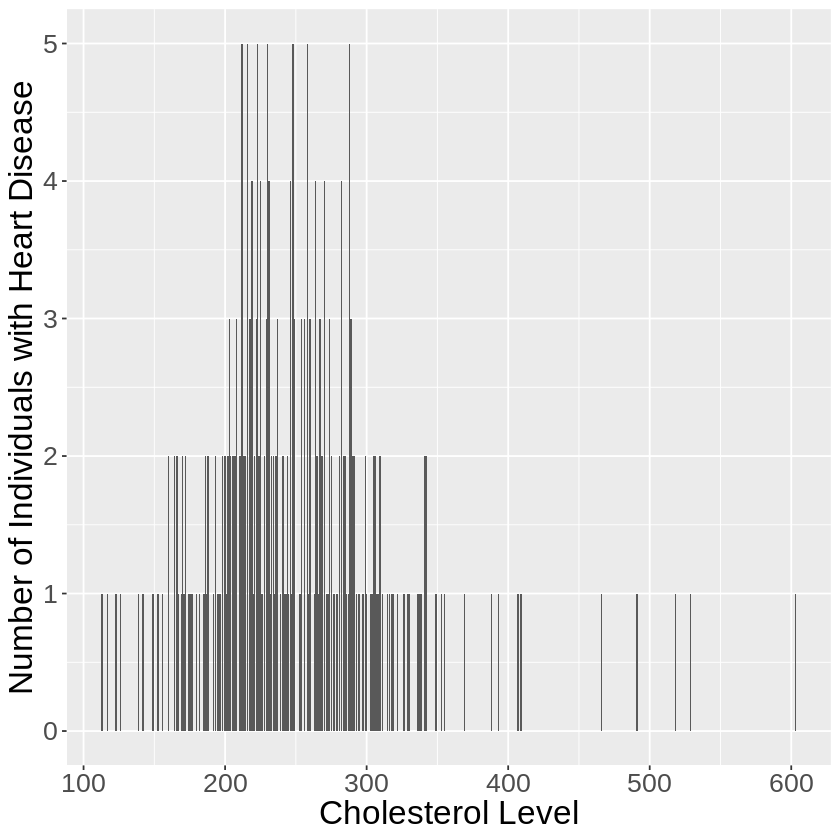

In [19]:
plot_cholesterol <- cholesterol %>%

ggplot(aes(x = Cholesterol, y = number_ppl_w_disease))+
geom_bar(stat = "identity") +
xlab("Cholesterol Level")+
ylab("Number of Individuals with Heart Disease")+
theme(text = element_text(size = 20))

plot_cholesterol

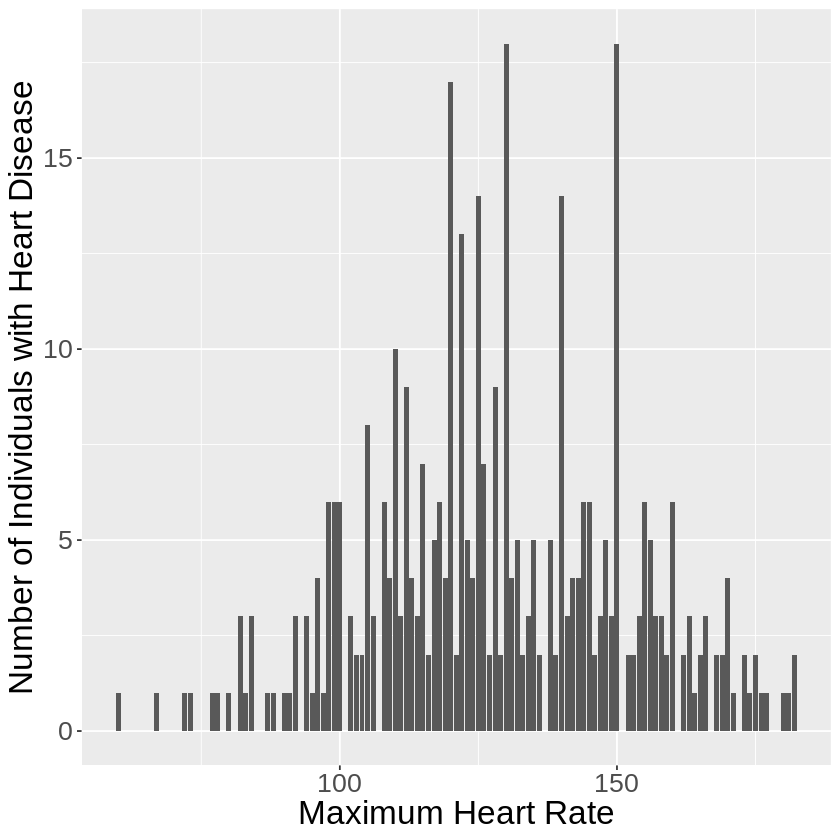

In [20]:
plot_maxHR <- maxHR %>%

ggplot(aes(x = MaxHR, y = number_ppl_w_disease))+
geom_bar(stat = "identity") +
xlab("Maximum Heart Rate")+
ylab("Number of Individuals with Heart Disease")+
theme(text = element_text(size = 20))

plot_maxHR

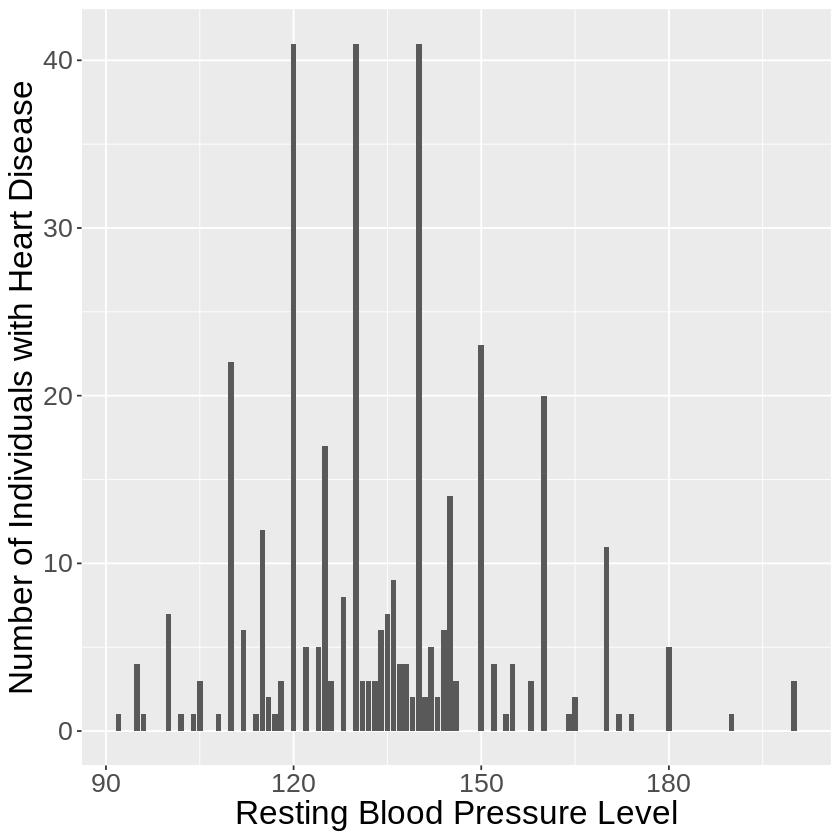

In [21]:
plot_RestingBP <- RestingBP %>%

ggplot(aes(x = RestingBP, y = number_ppl_w_disease))+
geom_bar(stat = "identity") +
xlab("Resting Blood Pressure Level")+
ylab("Number of Individuals with Heart Disease")+
theme(text = element_text(size = 20))

plot_RestingBP

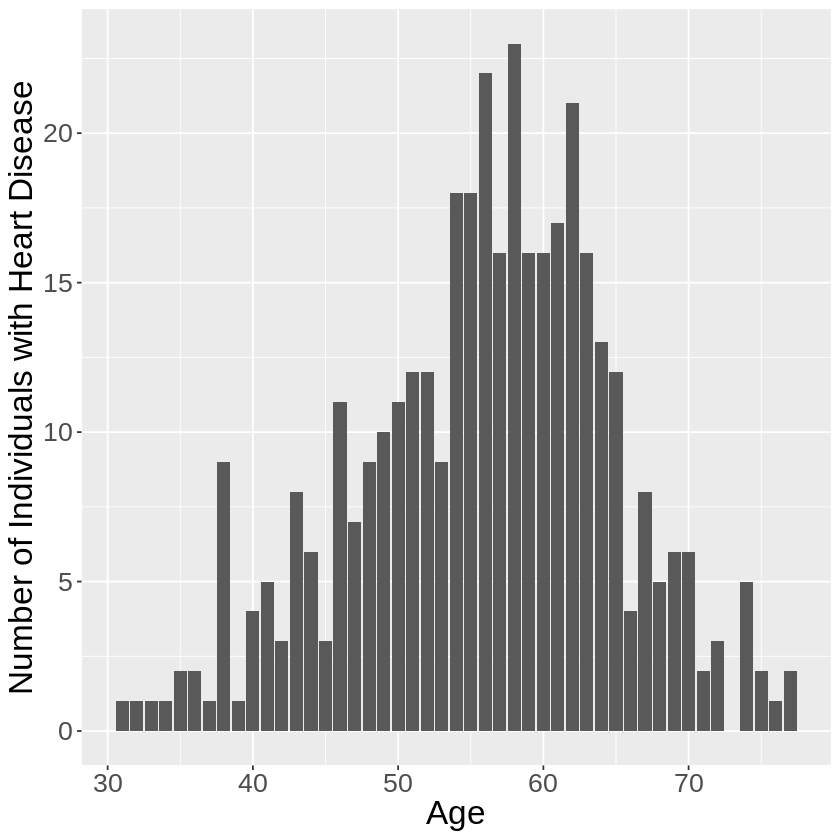

In [22]:
plot_Age <- Age %>%

ggplot(aes(x = Age, y = number_ppl_w_disease))+
geom_bar(stat = "identity") +
xlab("Age")+
ylab("Number of Individuals with Heart Disease")+
theme(text = element_text(size = 20))

plot_Age

In order to predict whether or not an individual is at high risk of heart disease, we will build a classifier informed using data from the following columns (variables) from the heart.csv dataset: Age, Cholesterol, RestingBP, MaxHR, ChestPainType, Sex, and RestingECG.

In the above preliminary data analysis, we wanted to analyze whether or not our predictor variables appeared to have a positive correlation to heart disease, so we created bar graphs whcih plotted each predictor variable against the number of individuals who had heart disease. This allowed us to see if there was a significant peak in the bar graph, as this would indicate that there is a level/ type of the predictor variable that is highly associated with heart disease. For example, above we measured the relationship between Cholesterol level and number of individuals with heart disease. From this graph (see above), we can conclude that a cholesterol level between 200 and 300 is likely positively related to having a heart disease. Thus choosing cholesterol level as a predictor variable is a good choice.

For the rest of the project, when the analysis goes deeper, we may also use scatter plots to show the density of a distribution or analyze the relationship of 3 variables by representing one of them by colors.


To sum up, we aim to predict the likelihood of a person getting heart disease based on data from heart.csv and the above stated predictor variables. Coming into the project, we expect to find that people with cholesterol within a certain range, and older male individuals for instance will have a higher likelihood of developing heart disease, however we are interested in exploring whether other factors such as chest pain type, resting ECG, resting blood pressure, and maximum heart rate have an impact on the likeliness of heart disease developement.

The findings of this data will give a clearer idea of what factors are likely to cause heart disease among individuals. Furthermore, it will give clarity on lifestyle decisions to make or avoid to prevent potential heart disease. Findings of our project could lead to further investigation surrounding what other factors may contribute to heart disease, such as BMI, physical activity levels, and diet.

To first create an idea of how we can visualize the data we will need to select two numerical predictors, and create a scatterplot of both variables. The color of each point would represent whether or not the patient has suffered a heart disease or not.

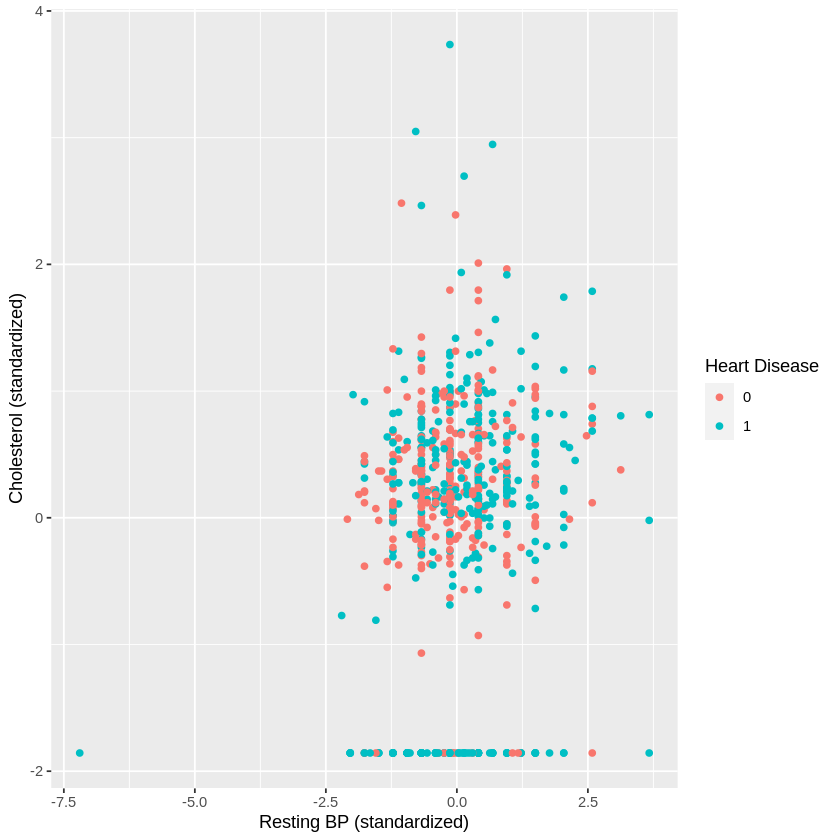

In [24]:
rbp_chol <- Heart_disease_train %>%
        mutate(scaled_rbp = scale(RestingBP, center = TRUE),
               scaled_chol = scale(Cholesterol, center = TRUE)) %>%
        ggplot(aes(x = scaled_rbp, y = scaled_chol, color = HeartDisease)) +
        geom_point() +
        labs(x = "Resting BP (standardized)", y = "Cholesterol (standardized)", color = "Heart Disease")

rbp_chol

As shown in the graph above, several red points are overlapping, and although the bottom right shows a significant number of patients with heart disease, overall it is not a good reference due to the significant overlapping.

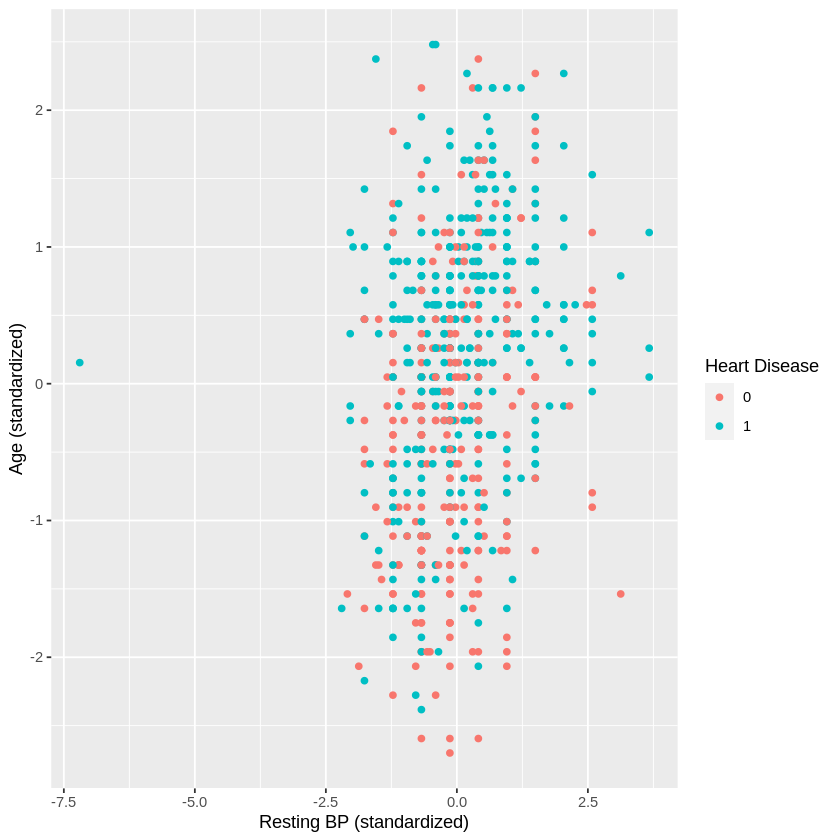

In [25]:
rbp_age <- Heart_disease_train %>%
        mutate(scaled_rbp = scale(RestingBP, center = TRUE),
               scaled_age = scale(Age, center = TRUE)) %>%
        ggplot(aes(x = scaled_rbp, y = scaled_age, color = HeartDisease)) +
        geom_point() +
        labs(x = "Resting BP (standardized)", y = "Age (standardized)", color = "Heart Disease")

rbp_age

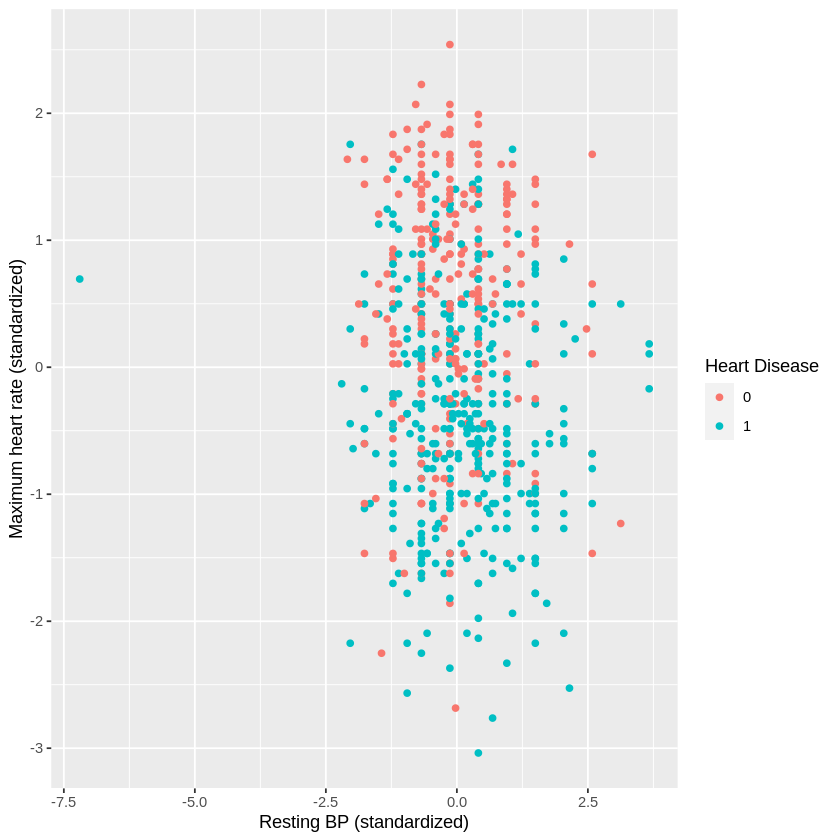

In [26]:
rbp_maxhr <- Heart_disease_train %>%
        mutate(scaled_rbp = scale(RestingBP, center = TRUE),
               scaled_maxhr = scale(MaxHR, center = TRUE)) %>%
        ggplot(aes(x = scaled_rbp, y = scaled_maxhr, color = HeartDisease)) +
        geom_point() +
        labs(x = "Resting BP (standardized)", y = "Maximum heart rate (standardized)", color = "Heart Disease")

rbp_maxhr

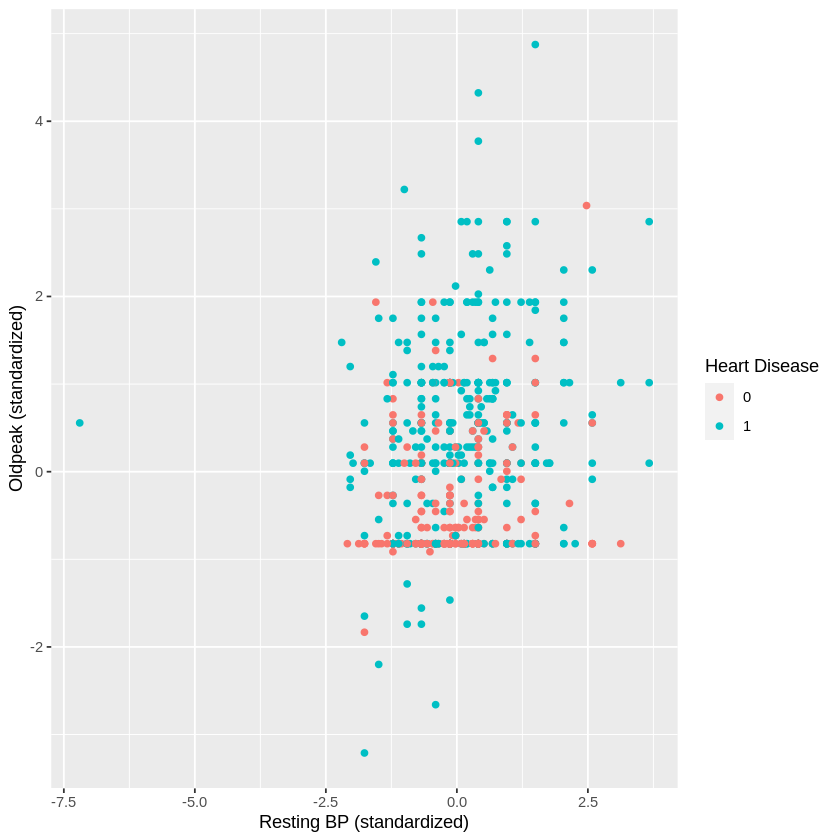

In [27]:
rbp_oldp <- Heart_disease_train %>%
        mutate(scaled_rbp = scale(RestingBP, center = TRUE),
               scaled_oldp = scale(Oldpeak, center = TRUE)) %>%
        ggplot(aes(x = scaled_rbp, y = scaled_oldp, color = HeartDisease)) +
        geom_point() +
        labs(x = "Resting BP (standardized)", y = "Oldpeak (standardized)", color = "Heart Disease")

rbp_oldp

In [29]:
hd_vfold <- vfold_cv(Heart_disease_train, v = 10, strata = HeartDisease)

In [30]:
hd_recipe <- recipe(HeartDisease ~ ., data = Heart_disease_train) %>%
            step_scale(all_predictors()) %>%
            step_center(all_predictors())

hd_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          5

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [31]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
            set_engine("kknn") %>%
            set_mode("classification")
            
knn_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [32]:
k_values <- tibble(neighbors = seq(from = 1, to = 150, by = 8)) 

knn_results <- workflow() %>%
            add_recipe(hd_recipe) %>%
            add_model(knn_spec) %>%
            tune_grid(resamples = hd_vfold, grid = k_values) %>%
            collect_metrics()

accs <- knn_results %>%
      filter(.metric == "accuracy")

accs



neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7082128,10,0.013071402,Model01
9,accuracy,binary,0.7779942,10,0.015664402,Model02
17,accuracy,binary,0.7736043,10,0.013577124,Model03
25,accuracy,binary,0.7736031,10,0.010556191,Model04
33,accuracy,binary,0.7677433,10,0.009261124,Model05
41,accuracy,binary,0.7705785,10,0.011440259,Model06
49,accuracy,binary,0.7676172,10,0.010100153,Model07
57,accuracy,binary,0.7589210,10,0.009895514,Model08
65,accuracy,binary,0.7662313,10,0.009781478,Model09


In [33]:
max_acc <- accs %>%
        filter(mean == max(mean))

max_acc

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
9,accuracy,binary,0.7779942,10,0.0156644,Model02


From this we observe that the ideal k-value for k-nearest neighbors is 9, with an estimated accuracy of 78.2%

In [ ]:
knn_spec_final <- nearest_neighbor(weight_func = "rectangular", neighbors = 9) %>%
            set_engine("kknn") %>%
            set_mode("classification")

knn_fit <- workflow() %>%
  add_recipe(hd_recipe) %>%
  add_model(knn_spec_final) %>%
  fit(data = Heart_disease_train)

knn_fit

In [40]:
hd_test_predictions <- predict(knn_fit, Heart_disease_test) %>%
      bind_cols(Heart_disease_test)

hd_test_predictions

ERROR: Error in predict(knn_fit, Heart_disease_test): object 'knn_fit' not found


In [37]:
conf_acc <- hd_test_predictions %>%
        conf_mat(truth = HeartDisease, estimate = .pred_class)

conf_acc

          Truth
Prediction   0   1
         0  79  26
         1  23 101

In [38]:
predictors <- colnames(Heart_disease_train %>% 
                       select(-HeartDisease))

In [39]:
# create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) %>%
     set_engine("kknn") %>%
     set_mode("classification")

# create a 5-fold cross-validation object
hd_vfold_10 <- vfold_cv(Heart_disease_train, v = 10, strata = HeartDisease)

# store the total number of predictors
n_total <- length(predictors)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(predictors)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, predictors[[j]])
        model_string <- paste("HeartDisease", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        hd_recipe <- recipe(as.formula(model_string), 
                                data = Heart_disease_train) %>%
                          step_scale(all_predictors()) %>%
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() %>%
          add_recipe(hd_recipe) %>%
          add_model(knn_spec) %>%
          tune_grid(resamples = hd_vfold_10, grid = 10) %>%
          collect_metrics() %>%
          filter(.metric == "accuracy") %>%
          summarize(mx = max(mean))
        acc <- acc$mx %>% unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies %>% 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}

accuracies

ERROR: Error in names[[jstar]]: object of type 'builtin' is not subsettable


In [97]:
Heart_disease_full

Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<fct>
40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1


In [ ]:
Heart_disease_train